#  Superstore Sales Analysis

## Objective:
Analyze the Superstore dataset to understand sales trends, profits, and performance across categories and regions.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../resources/superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##  1.Data Cleaning


In [14]:
df.info()          
df.isnull().sum()  
df.describe()      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 2. Exploratory Data Analysis (EDA)


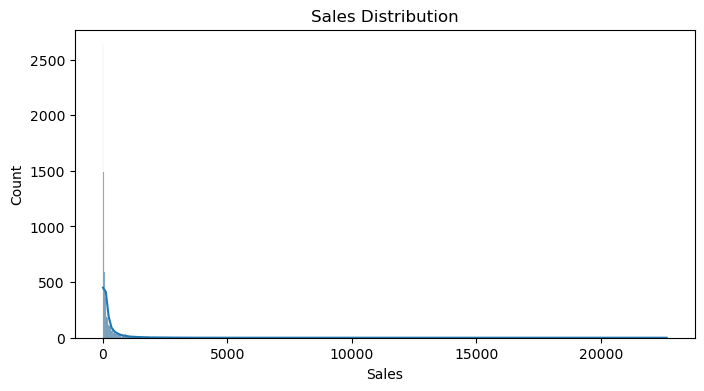

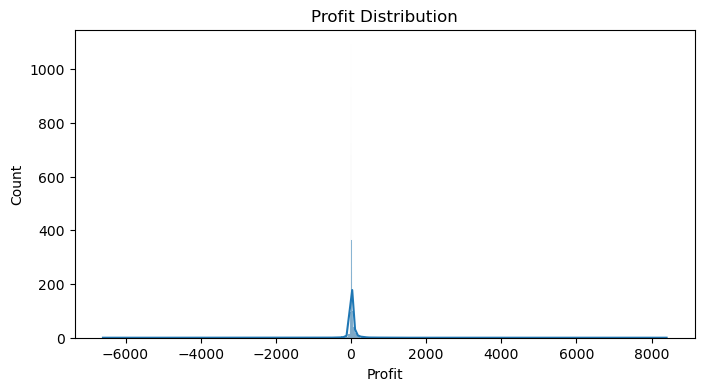

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Profit'], kde=True)
plt.title("Profit Distribution")
plt.show()


## 3. Sales by Category


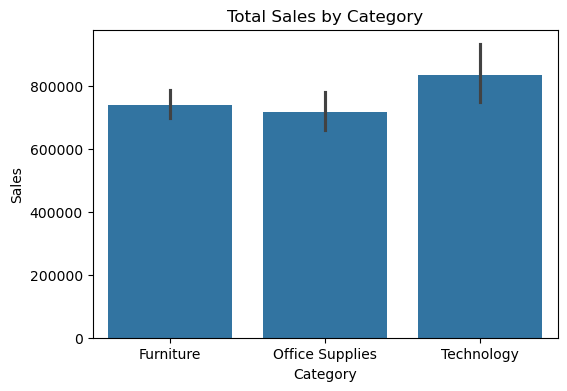

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.show()


## 4. Sales and Profit by Region


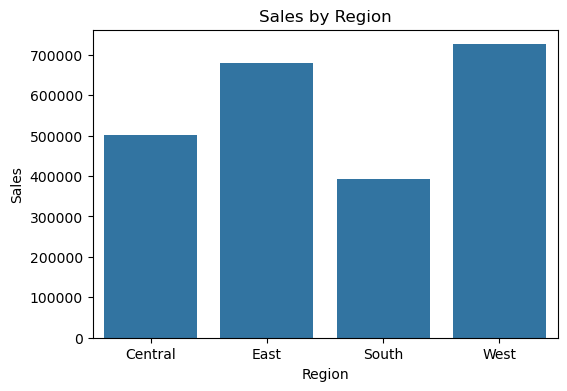

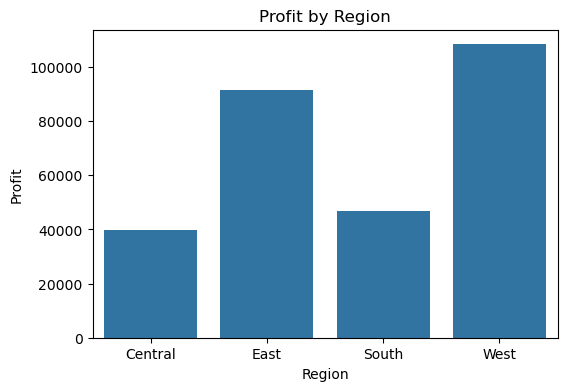

In [17]:
region = df.groupby("Region")[["Sales","Profit"]].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Sales", data=region)
plt.title("Sales by Region")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="Region", y="Profit", data=region)
plt.title("Profit by Region")
plt.show()


## 5. Impact of Discount on Profit


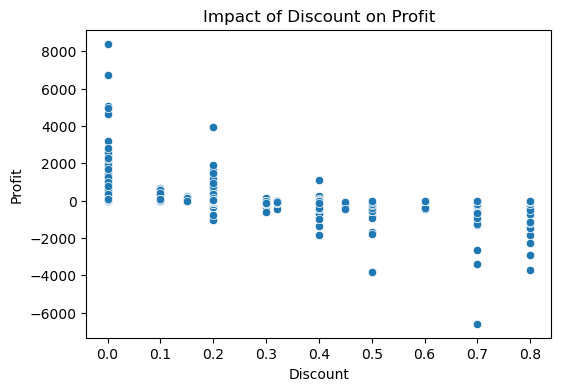

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Impact of Discount on Profit")
plt.show()


## 6. Time Series Analysis (Sales Over Time)

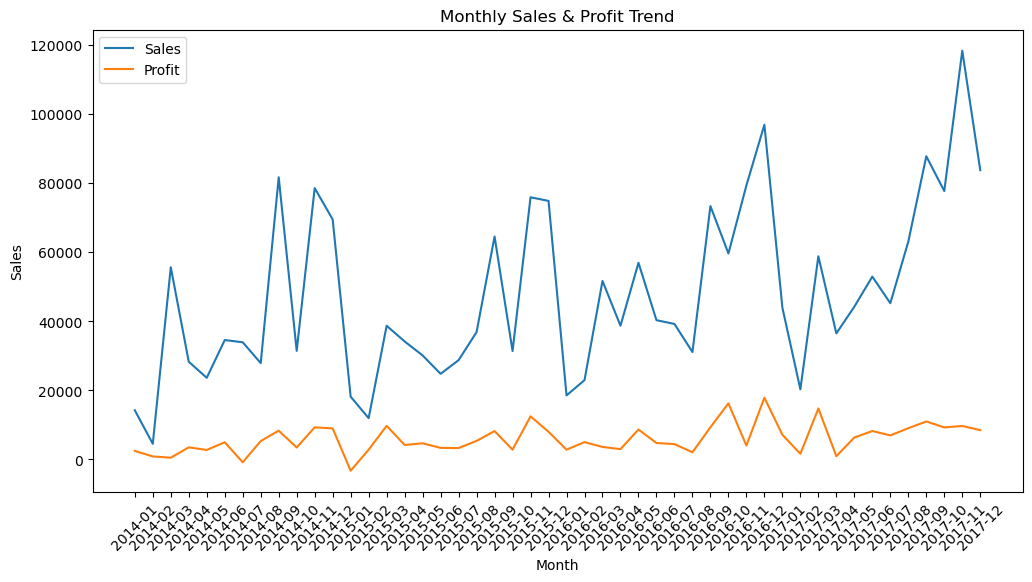

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')[['Sales','Profit']].sum().reset_index().sort_values('Month')
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, label="Sales")
sns.lineplot(x='Month', y='Profit', data=monthly_sales, label="Profit")
plt.title("Monthly Sales & Profit Trend")
plt.xticks(rotation=45)
plt.show()


## 7. State / City Performance

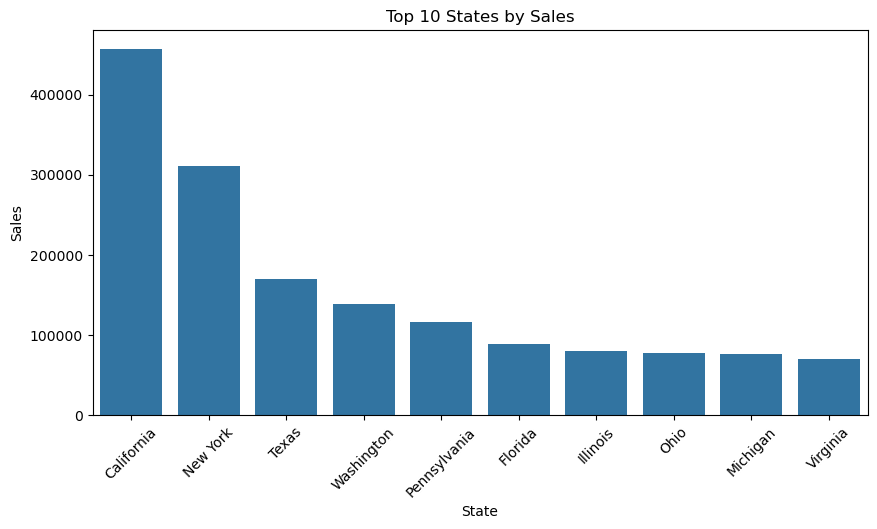

In [20]:
top_states = df.groupby("State")[["Sales","Profit"]].sum().sort_values("Sales", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states['Sales'])
plt.title("Top 10 States by Sales")
plt.xticks(rotation=45)
plt.show()


## 8. Sub-Category Insights

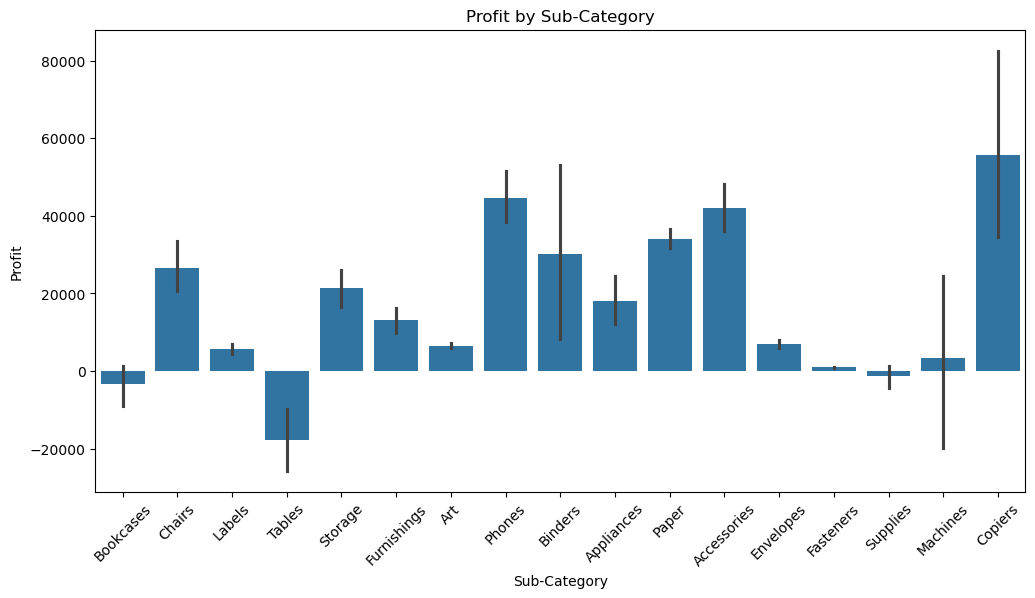

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x="Sub-Category", y="Profit", data=df, estimator=sum)
plt.title("Profit by Sub-Category")
plt.xticks(rotation=45)
plt.show()


## 9. Profitability Heatmap

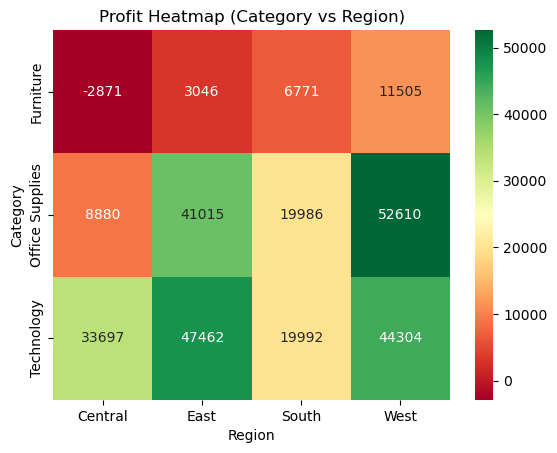

In [23]:
pivot = df.pivot_table(index="Category", columns="Region", values="Profit", aggfunc="sum")
sns.heatmap(pivot, annot=True, cmap="RdYlGn", fmt=".0f")
plt.title("Profit Heatmap (Category vs Region)")
plt.show()


## 10. Customer Segment Analysis

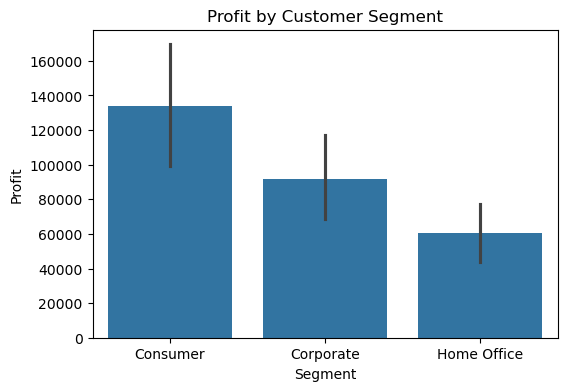

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x="Segment", y="Profit", data=df, estimator=sum)
plt.title("Profit by Customer Segment")
plt.show()


## 11. Correlation Check

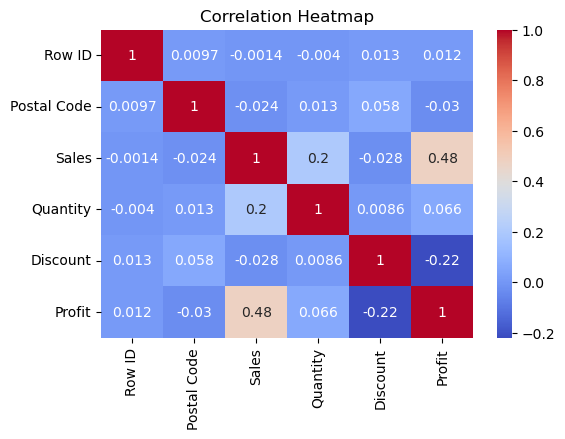

In [6]:
plt.figure(figsize=(6,4))

corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 12. Top & Bottom Performing States

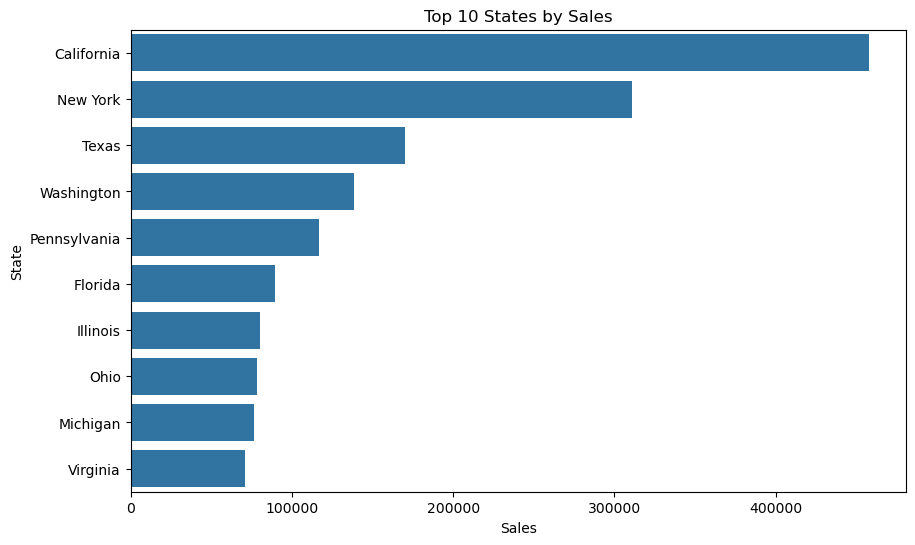

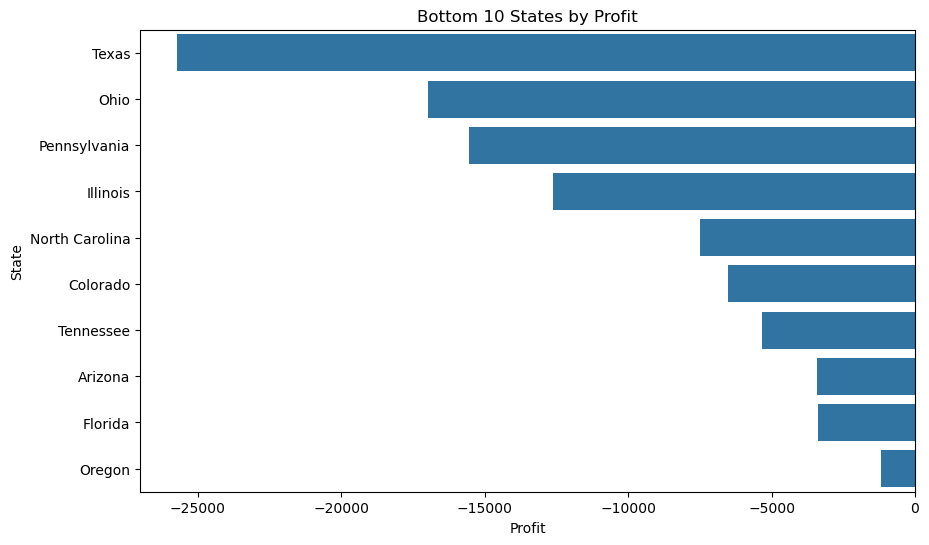

In [28]:
state_sales = df.groupby("State")[["Sales","Profit"]].sum().sort_values("Sales", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_sales["Sales"], y=state_sales.index)
plt.title("Top 10 States by Sales")
plt.show()

state_profit = df.groupby("State")[["Sales","Profit"]].sum().sort_values("Profit").head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_profit["Profit"], y=state_profit.index)
plt.title("Bottom 10 States by Profit")
plt.show()


## 13. Sub-Category Level Analysis

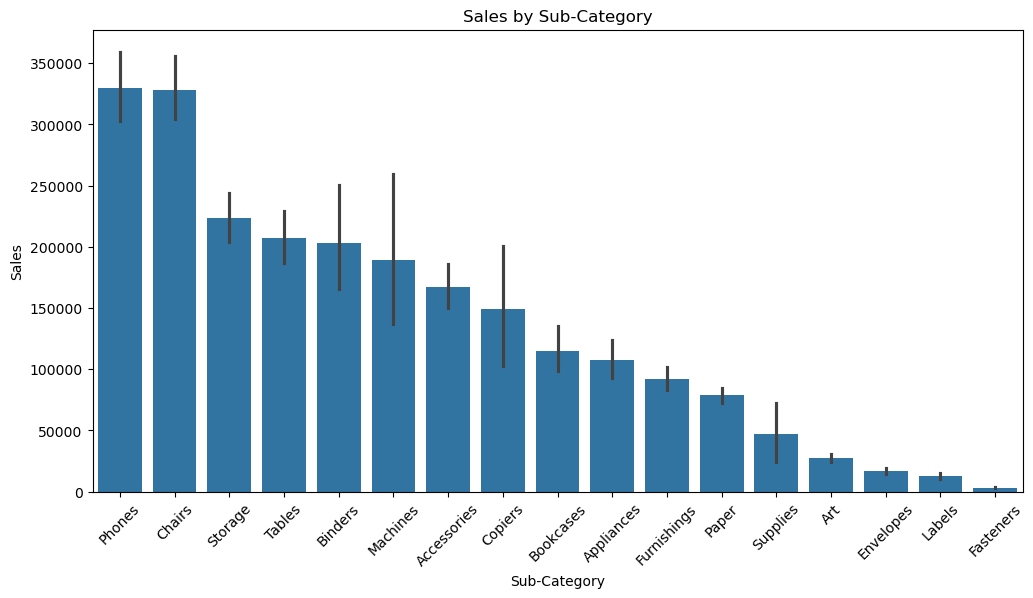

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x="Sub-Category", y="Sales", data=df, estimator=sum, order=df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title("Sales by Sub-Category")
plt.show()


## 14. Yearly & Monthly Trends

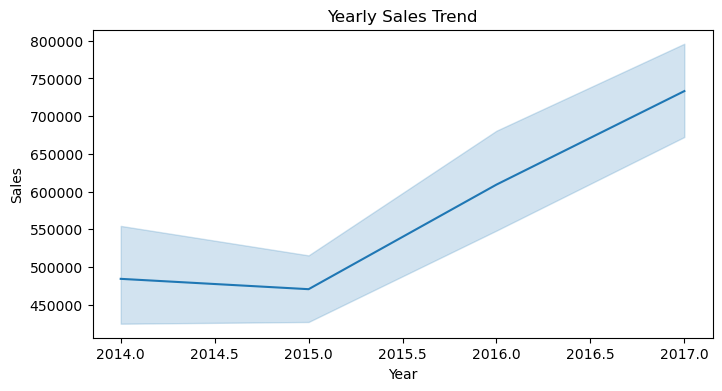

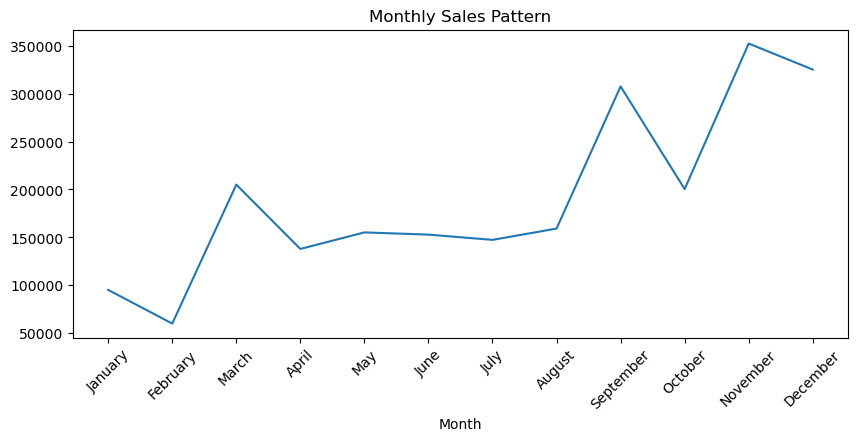

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Yearly Sales Trend
plt.figure(figsize=(8,4))
sns.lineplot(x="Year", y="Sales", data=df, estimator=sum)
plt.title("Yearly Sales Trend")
plt.show()

# Monthly Sales Pattern
monthly_sales = df.groupby("Month")["Sales"].sum().reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
])

plt.figure(figsize=(10,4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales Pattern")
plt.xticks(rotation=45)
plt.show()


## 15. Profit Margin Analysis

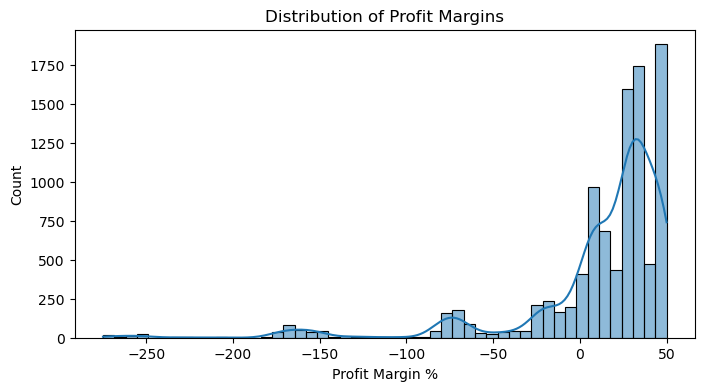

In [33]:
df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100

plt.figure(figsize=(8,4))
sns.histplot(df['Profit Margin %'], bins=50, kde=True)
plt.title("Distribution of Profit Margins")
plt.show()


## 16. Correlation Heatmap

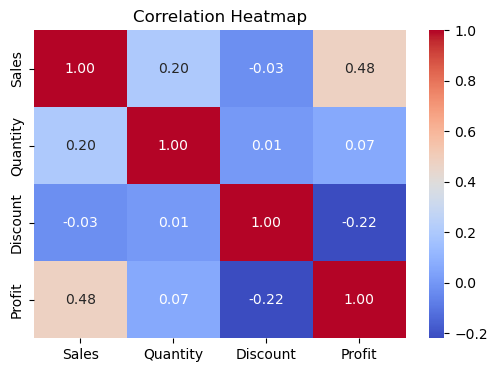

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales","Quantity","Discount","Profit"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Conclusion:
- Top-performing categories: Technology leads in both sales and profits, while Furniture struggles with profit despite sales.
- Regional insights: The West region outperforms others, while the South faces profitability challenges.
- State-level analysis: California and New York dominate sales, whereas Texas and Illinois report consistent losses.
- Seasonality: November and December show peak sales due to holiday demand.
- Discount strategy: Higher discounts consistently hurt profitability; a balance is needed.